In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [92]:
k=3

In [68]:
df=pd.read_csv('kmeans.csv')

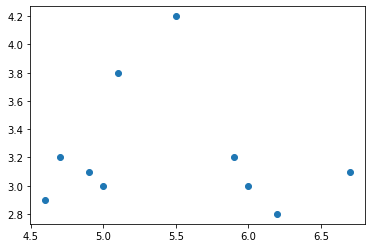

In [69]:
plt.scatter(df['X1'],df['X2'])
plt.show()

In [70]:
x1=df['X1'].values
x2=df['X2'].values
points=np.array(list(zip(x1,x2)))
points

array([[5.9, 3.2],
       [4.6, 2.9],
       [6.2, 2.8],
       [4.7, 3.2],
       [5.5, 4.2],
       [5. , 3. ],
       [4.9, 3.1],
       [6.7, 3.1],
       [5.1, 3.8],
       [6. , 3. ]])

In [71]:
cx=[6.2, 6.6 ,6.5]
cy=[3.2, 3.7, 3.0]
centroids=np.array(list(zip(cx,cy)))
centroids

array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]])

In [72]:
old_centroids=np.zeros(centroids.shape)
old_centroids

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [73]:
def euclidean(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [74]:
error=euclidean(centroids,old_centroids,None)
error

12.53714481052205

In [75]:
clusters=np.zeros(len(points))
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
# colors=np.zeros(len(points))

In [76]:
while error!=0:
    for i in range(len(points)):
        distances=euclidean(points[i],centroids)
        clusters[i]=np.argmin(distances)
    old_centroids = deepcopy(centroids)
    for j in range(k):
        points_in_cluster=[points[a] for a in range(len(points)) if clusters[a]==j ]
        centroids[j]=np.mean(points_in_cluster,axis=0)
    error=euclidean(centroids,old_centroids,None)
    print("new iteration**************************************")
    print("clusters: ",clusters)
    print("centroids: ",centroids)
    print("error: ",error)

new iteration**************************************
clusters:  [0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
centroids:  [[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
error:  1.588639515498743
new iteration**************************************
clusters:  [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
centroids:  [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
error:  0.5484788798419251
new iteration**************************************
clusters:  [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
centroids:  [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
error:  0.0


In [88]:
colors=[]
for i in range(len(clusters)):
    if clusters[i]==0:
        colors.append('r')
    elif clusters[i]==1:
        colors.append('g')
    else:
        colors.append('b')

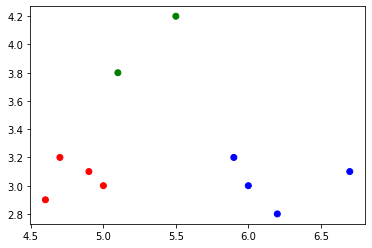

In [90]:
plt.scatter(df['X1'],df['X2'],c=colors)
plt.show()